<a href="https://colab.research.google.com/github/pradeepprasad/Machine_Learning_Workspace/blob/master/Visualisation_Hands_On_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # get seaborn libraries
import matplotlib.pyplot as plt
#import matplotlib as plt
#from matplotlib import *
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from subprocess import check_output
print(check_output(["ls","/content/drive/My Drive/data/fatal-police-shootings-in-the-us"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


MedianHouseholdIncome2015.csv
PercentagePeopleBelowPovertyLevel.csv
PercentOver25CompletedHighSchool.csv
PoliceKillingsUS.csv
ShareRaceByCity.csv



In [0]:
median_house_hold_income = pd.read_csv("/content/drive/My Drive/data/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv",encoding="unicode_escape")
median_house_hold_income = pd.read_csv("/content/drive/My Drive/data/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv",encoding="windows-1252")
#median_house_hold_income_clean = pd.read_csv("../input/median-householdincome2015-clean/MedianHouseholdIncome2015_clean.csv",encoding="windows-1252")
percentage_below_poverty_line = pd.read_csv("/content/drive/My Drive/data/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv",encoding="windows-1252")
percentage_over_25_compltd_high_school = pd.read_csv("/content/drive/My Drive/data/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv",encoding="windows-1252")
police_killing = pd.read_csv("/content/drive/My Drive/data/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv",encoding="windows-1252")
race_by_city = pd.read_csv("/content/drive/My Drive/data/fatal-police-shootings-in-the-us/ShareRaceByCity.csv",encoding="windows-1252")

In [5]:
median_house_hold_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [6]:
median_house_hold_income.tail()

,Geographic Area,City,Median Income
29317,WY,Woods Landing-Jelm CDP,NaN
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500
29321,WY,Y-O Ranch CDP,NaN


In [7]:
race_by_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [8]:
race_by_city.describe()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
count,29268,29268,29268,29268,29268,29268,29268
unique,51,24219,997,926,628,409,956
top,PA,Franklin city,100,0,0,0,0
freq,1764,16,1051,6587,6930,8537,2489


In [9]:
percentage_below_poverty_line['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [10]:
percentage_below_poverty_line['Geographic Area'].describe()

count     29329
unique       51
top          PA
freq       1762
Name: Geographic Area, dtype: object

Lets draw bar chart with available data.

Text(0.5, 1.0, 'Poverty Rate Given States')

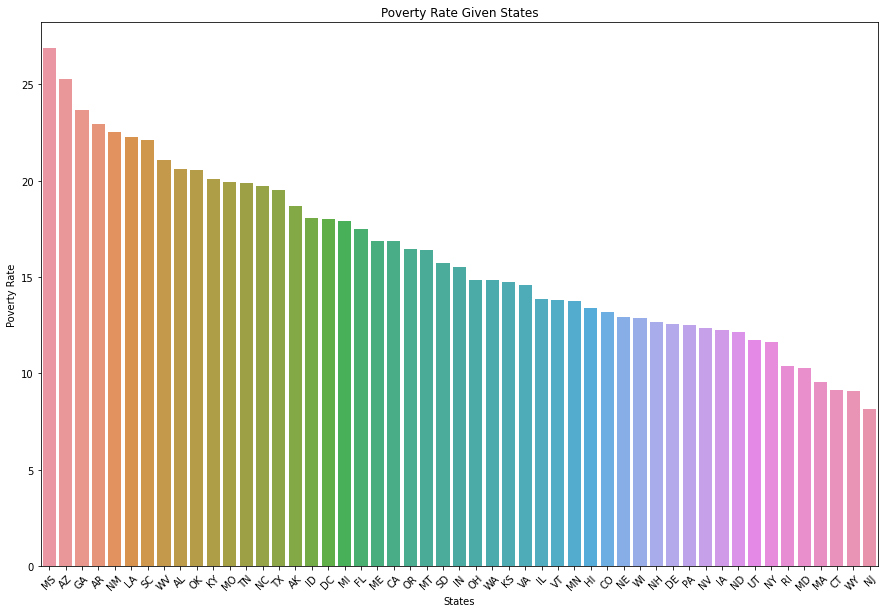

In [11]:
percentage_below_poverty_line.poverty_rate.replace(['-'],0.0,inplace=True)
percentage_below_poverty_line.poverty_rate = percentage_below_poverty_line.poverty_rate.astype(float)
area_list = list(percentage_below_poverty_line['Geographic Area'].unique())
area_poverty_ratio = []

for i in area_list:
    x = percentage_below_poverty_line[percentage_below_poverty_line['Geographic Area'] == i ]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate) 
    
dataFM_areaList_areaPovertyratio = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (dataFM_areaList_areaPovertyratio['area_poverty_ratio'].sort_values(ascending=False)).index.values
dataFM_areaList_areaPovertyratio_sorted = dataFM_areaList_areaPovertyratio.reindex(new_index)

#visualisation

plt.figure(figsize=(15,10))
sns.barplot(x=dataFM_areaList_areaPovertyratio_sorted['area_list'], y=dataFM_areaList_areaPovertyratio_sorted['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')


Lets create BarChart for house hold income similiar to poverty rate for given states.

In [12]:
median_house_hold_income.describe()

,Geographic Area,City,Median Income
count,29322,29322,29271
unique,51,24249,14592
top,PA,Franklin city,(X)
freq,1762,16,1113


In [13]:
median_house_hold_income["Median Income"].head()

0    11207
1    25615
2    42575
3    37083
4    21667
Name: Median Income, dtype: object

In [14]:
median_house_hold_income.count()

Geographic Area    29322
City               29322
Median Income      29271
dtype: int64

In [15]:
median_house_hold_income["Median Income"].str.isnumeric()

0        True
1        True
2        True
3        True
4        True
         ... 
29317     NaN
29318    True
29319    True
29320    True
29321     NaN
Name: Median Income, Length: 29322, dtype: object

In [16]:
iFlowStatus = median_house_hold_income[median_house_hold_income['Median Income'].str.contains('iFlow', na=False)]['Status']
print(iFlowStatus)

KeyError: ignored

# median_house_hold_income_clean contains some values like (X) which I am not able to clean. In excel, because data has more than 10,000 unique value, not able to find by filter feature of data option in excel sheet. Saving it to solve it later.

In [0]:
#median_house_hold_income['Median Income'] = median_house_hold_income['Median Income'].str.replace('-', '0').str.replace('(X)', '0').str.replace('(0)', '0').str.replace('2,500-', '0')
#median_house_hold_income['Median Income'] = median_house_hold_income['Median Income'].dropna()
median_house_hold_income_clean['Median Income'].replace(['-'],0.0,inplace=True)
#is_numeric = median_house_hold_income["Median Income"].str.isnumeric()
#median_house_hold_income['Median Income'] = median_house_hold_income['Median Income'].drop(median_house_hold_income['Median Income'] =='(0)')
#median_house_hold_income["Median Income"].replace(['(X)'],0.0,inplace=True)
#median_house_hold_income["Median Income"].replace([''],0.0,inplace=True)
#median_house_hold_income['Median Income'] = median_house_hold_income['Median Income'].str.replace('-', '0').str.replace('(X)', '0').str.replace('(0)', '0').str.replace('2,500-', '0')
#median_house_hold_income['Median Income'] = median_house_hold_income['Median Income'].replace(to_replace='None', value=np.nan).dropna()
#median_house_hold_income = median_house_hold_income[is_numeric] 
median_house_hold_income_clean['Median Income'] = median_house_hold_income_clean['Median Income'].astype(float)
area_list = list(median_house_hold_income_clean['Geographic Area'].unique())
area_median_ratio = []

for i in area_list:
    x = median_house_hold_income_clean[median_house_hold_income_clean['Geographic Area'] == i ]
    area_median_income = sum(x['Median Income'])/len(x)
    area_median_ratio.append(area_median_income) 
    
dataFM_areaList_areaMedianratio = pd.DataFrame({'area_list': area_list,'area_median_ratio':area_median_ratio})
new_index = (dataFM_areaList_areaMedianratio['area_median_ratio'].sort_values(ascending=False)).index.values
dataFM_areaList_areaMedianratio_sorted = dataFM_areaList_areaMedianratio.reindex(new_index)

#visualisation

plt.figure(figsize=(15,10))
sns.barplot(x=dataFM_areaList_areaMedianratio_sorted['area_list'], y=dataFM_areaList_areaMedianratio_sorted['area_median_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Median Income Rate')
plt.title('Income Rate Given States')

Move for next plot figure

In [17]:
police_killing.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [18]:
separate_name = police_killing.name[police_killing.name != 'TK TK'].str.split()
separate_name.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [19]:
separate_name_TK = police_killing.name[police_killing.name == 'TK TK'].str.split()
separate_name_TK.head()

928     [TK, TK]
1397    [TK, TK]
1419    [TK, TK]
1500    [TK, TK]
1646    [TK, TK]
Name: name, dtype: object

In [20]:
first_name,last_name = zip(*separate_name)
first_name
#last_name

('Tim',
 'Lewis',
 'John',
 'Matthew',
 'Michael',
 'Kenneth',
 'Kenneth',
 'Brock',
 'Autumn',
 'Leslie',
 'Patrick',
 'Ron',
 'Hashim',
 'Nicholas',
 'Omarr',
 'Loren',
 'James',
 'Artago',
 'Thomas',
 'Jimmy',
 'Andy',
 'Tommy',
 'Brian',
 'Salvador',
 'John',
 'Richard',
 'Marcus',
 'Michael',
 'Mario',
 'Talbot',
 'Robert',
 'Jeffrey',
 'Donte',
 'Kavonda',
 'Quincy',
 'Jose',
 'Nathan',
 'Scott',
 'Zaki',
 'Terence',
 'Pablo',
 'Daniel',
 'Jonathan',
 'Carter',
 'Paul',
 'Dewayne',
 'Todd',
 'Miguel',
 'Isaac',
 'Andrew',
 'Tiano',
 'Kristiana',
 'Robert',
 'Demaris',
 'Jose',
 'Wendell',
 'Daryl',
 'Darin',
 'Orlando',
 'William',
 'Jessie',
 'Raymond',
 'Joshua',
 'David',
 'Nicolas',
 'Chris',
 'Jermonte',
 'Tiffany',
 'Alan',
 'Matautu',
 'Cody',
 'Ralph',
 'Alan',
 'John',
 'Victor',
 'Edward',
 'Jacob',
 'David',
 'Francis',
 'Ledarius',
 'Yuvette',
 'Dewayne',
 'Anthony',
 'Jeremy',
 'Izzy',
 'Salvador',
 'Joaquin',
 'Jimmy',
 'Markell',
 'Paul',
 'Herbert',
 'John',
 'Jam

In [21]:
last_name

('Elliot',
 'Lee',
 'Paul',
 'Hoffman',
 'Rodriguez',
 'Joe',
 'Arnold',
 'Nichols',
 'Steele',
 'Sapp',
 'Wetter',
 'Sneed',
 'Hanif',
 'Ryan',
 'Julian',
 'Simpson',
 'Dudley',
 'Damon',
 'Hamby',
 'Foreman',
 'Martinez',
 'Smith',
 'Barbosa',
 'Figueroa',
 'Edward',
 'McClendon',
 'Golden',
 'Goebel',
 'Jordan',
 'Schroeder',
 'Edwards',
 'R.',
 'Sowell',
 'Earl',
 'Reed',
 'Ceja',
 'Massey',
 'Hall',
 'Shinwary',
 'Walker',
 'Meza',
 'Brumley',
 'Guillory',
 'Castle',
 'Campbell',
 'Carr',
 'Allen',
 'Angel',
 'Holmes',
 'Toto',
 'Meton',
 'Coignard',
 'Francis',
 'Turner',
 'Antonio',
 'King',
 'Myler',
 'Hutchins',
 'Jude',
 'Campbell',
 'Hernandez',
 'Kmetz',
 'Omar',
 'Garcia',
 'Leland',
 'Ingram',
 'Fletcher',
 'Terry',
 'Lance',
 'Nuu',
 'Karasek',
 'Willis',
 'James',
 'Barry',
 'Manuel',
 'Donnell',
 'Haglund',
 'Kassick',
 'Murphy',
 'D.',
 'Henderson',
 'Deshawn',
 'Purvis',
 'Lett',
 'Colon',
 'Muna',
 'Hernandez',
 'Ray',
 'Atkins',
 'Alfred',
 'Hill',
 'Sawyer',
 'All

In [22]:
name_list = first_name + last_name
name_list

('Tim',
 'Lewis',
 'John',
 'Matthew',
 'Michael',
 'Kenneth',
 'Kenneth',
 'Brock',
 'Autumn',
 'Leslie',
 'Patrick',
 'Ron',
 'Hashim',
 'Nicholas',
 'Omarr',
 'Loren',
 'James',
 'Artago',
 'Thomas',
 'Jimmy',
 'Andy',
 'Tommy',
 'Brian',
 'Salvador',
 'John',
 'Richard',
 'Marcus',
 'Michael',
 'Mario',
 'Talbot',
 'Robert',
 'Jeffrey',
 'Donte',
 'Kavonda',
 'Quincy',
 'Jose',
 'Nathan',
 'Scott',
 'Zaki',
 'Terence',
 'Pablo',
 'Daniel',
 'Jonathan',
 'Carter',
 'Paul',
 'Dewayne',
 'Todd',
 'Miguel',
 'Isaac',
 'Andrew',
 'Tiano',
 'Kristiana',
 'Robert',
 'Demaris',
 'Jose',
 'Wendell',
 'Daryl',
 'Darin',
 'Orlando',
 'William',
 'Jessie',
 'Raymond',
 'Joshua',
 'David',
 'Nicolas',
 'Chris',
 'Jermonte',
 'Tiffany',
 'Alan',
 'Matautu',
 'Cody',
 'Ralph',
 'Alan',
 'John',
 'Victor',
 'Edward',
 'Jacob',
 'David',
 'Francis',
 'Ledarius',
 'Yuvette',
 'Dewayne',
 'Anthony',
 'Jeremy',
 'Izzy',
 'Salvador',
 'Joaquin',
 'Jimmy',
 'Markell',
 'Paul',
 'Herbert',
 'John',
 'Jam

In [23]:
name_count = Counter(name_list)
most_common_names = name_count.most_common(15)
most_common_names

[('Michael', 91),
 ('David', 57),
 ('James', 56),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 37),
 ('Richard', 36),
 ('J.', 32),
 ('Anthony', 31),
 ('Jose', 28),
 ('Joshua', 28)]

In [24]:
x,y = zip(*most_common_names)
x,y=list(x),list(y)
x

['Michael',
 'David',
 'James',
 'Robert',
 'Joseph',
 'William',
 'Daniel',
 'John',
 'Christopher',
 'Lee',
 'Richard',
 'J.',
 'Anthony',
 'Jose',
 'Joshua']

In [25]:
y

[91, 57, 56, 48, 48, 47, 46, 42, 40, 37, 36, 32, 31, 28, 28]

Text(0.5, 1.0, 'Most common 15 Names or SurNames of killed people')

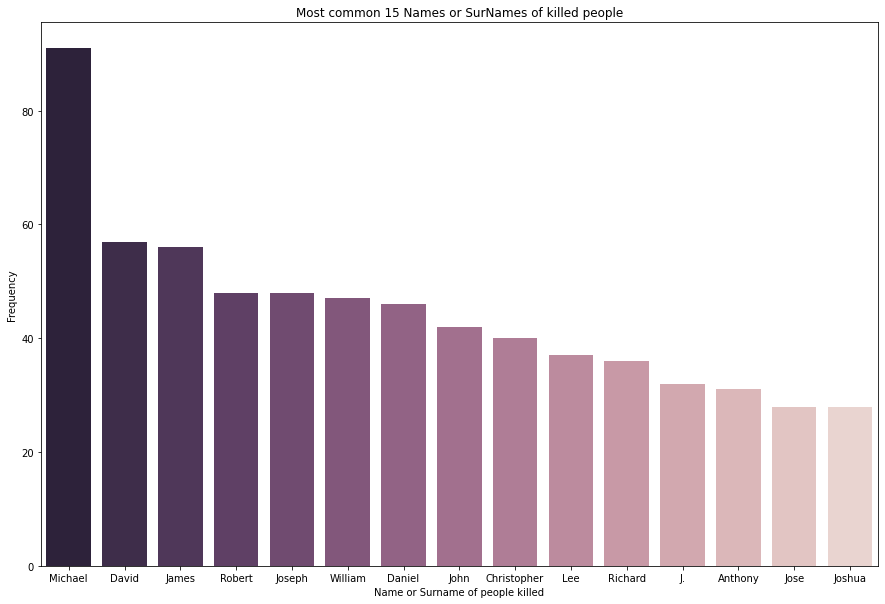

In [26]:
#now plot figure based on common names and count available to us
plt.figure(figsize=(15,10))
ax = sns.barplot(x=x, y=y, palette = sns.cubehelix_palette(len(x),reverse=True))
plt.xlabel('Name or Surname of people killed')
plt.ylabel('Frequency')
plt.title('Most common 15 Names or SurNames of killed people')

Now lets move to another data for plotting another visualisation using seaboarn.

In [27]:
percentage_over_25_compltd_high_school.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [0]:
#High school graduation rate state wise
percentage_over_25_compltd_high_school.percent_completed_hs.replace(['-'],0.0,inplace=True)#
#percentage_over_25_compltd_high_school.percent_completed_hs.describe()
percentage_over_25_compltd_high_school.percent_completed_hs = percentage_over_25_compltd_high_school.percent_completed_hs.astype(float)
#percentage_over_25_compltd_high_school.percent_completed_hs.describe()
area_list = list(percentage_over_25_compltd_high_school['Geographic Area'].unique())
area_high_school = []
for al in area_list:
  cities_under_single_GA = percentage_over_25_compltd_high_school[percentage_over_25_compltd_high_school['Geographic Area'] == al]
  area_high_school_rate = sum(cities_under_single_GA.percent_completed_hs) / len(cities_under_single_GA)
  area_high_school.append(area_high_school_rate)  
# Sorting data before visualising it 
data = pd.DataFrame({'area_list' : area_list, 'area_highschool_ratio':area_high_school }) # create a dictionary for area list and high school rate
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)
#done with preprocesing, ready for next step

Text(0.5, 1.0, 'Percentage of high school completed by over 25 by state wise')

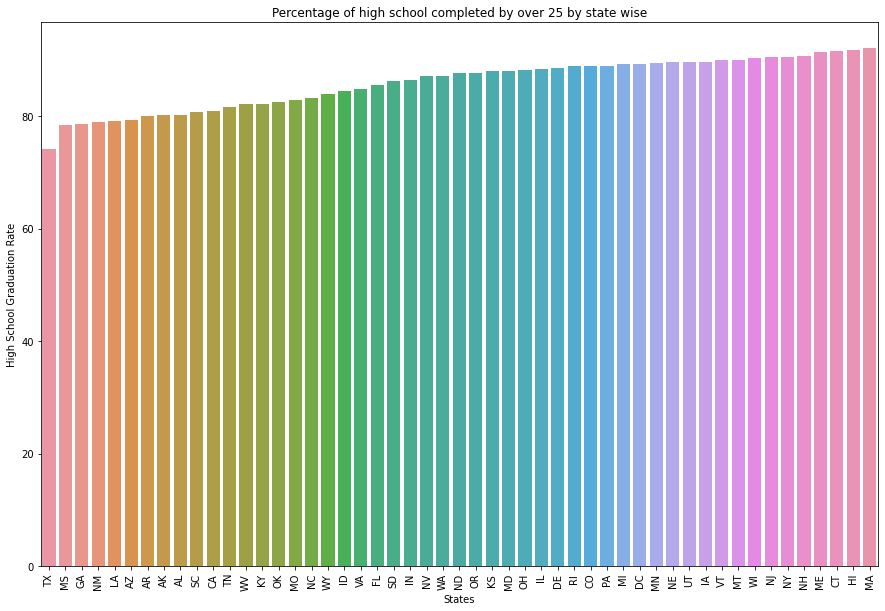

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2.area_list, y= sorted_data2.area_highschool_ratio)
plt.xticks(rotation = 90)
plt.xlabel('States')
plt.ylabel('High School Graduation Rate')
plt.title("Percentage of high school completed by over 25 by state wise")

Next visualisation is for race shared by each state.

In [30]:
race_by_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [31]:
race_by_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [0]:
# Percentage of state's population categorised by race
race_by_city.replace(['-'],0.0,inplace=True)
race_by_city.replace(['(X)'],0.0,inplace=True)
race_by_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = race_by_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(race_by_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for al in area_list:
  x = race_by_city[race_by_city['Geographic area'] == al]
  share_white.append(sum(x.share_white)/len(x))
  share_black.append(sum(x.share_black)/len(x))
  share_native_american.append(sum(x.share_native_american)/len(x))
  share_asian.append(sum(x.share_asian)/len(x))
  share_hispanic.append(sum(x.share_hispanic)/len(x))
#Pre-processing for visualisation ends here  

[Text(0, 0.5, 'State'),
 Text(0.5, 0, 'Percentage of Races'),
 Text(0.5, 1.0, 'Sates population share by Races')]

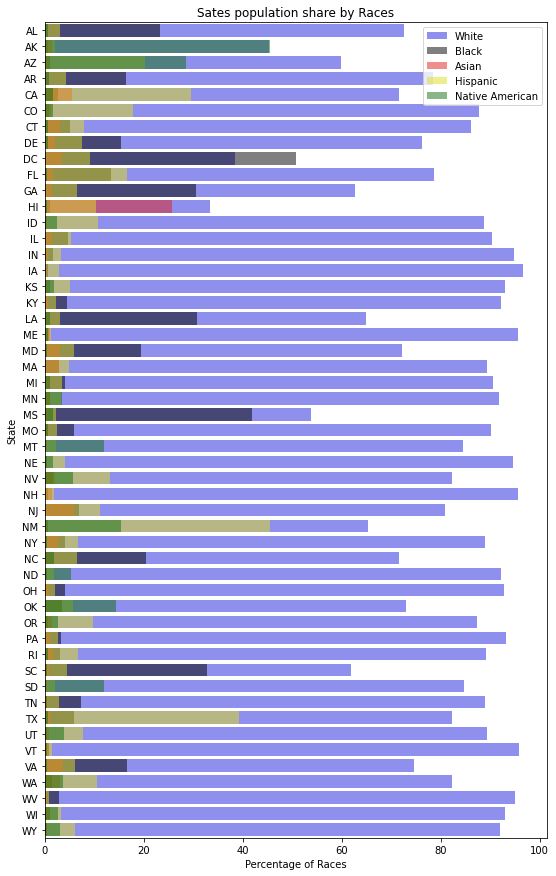

In [33]:
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white, y=area_list,color = 'blue', alpha = 0.5, label = 'White')
sns.barplot(x=share_black, y=area_list,color = 'black', alpha = 0.5, label = 'Black')
sns.barplot(x=share_asian, y=area_list,color = 'red', alpha = 0.5, label = 'Asian')
sns.barplot(x=share_hispanic, y=area_list,color = 'yellow', alpha = 0.5, label = 'Hispanic')
sns.barplot(x=share_native_american, y=area_list,color = 'green', alpha = 0.5, label = 'Native American')
ax.legend(loc='upper right',frameon = True)
ax.set(xlabel='Percentage of Races', ylabel = 'State', title = 'Sates population share by Races')

# Visualise another diagram showing both poverty ratio and education level.

In [34]:
dataFM_areaList_areaPovertyratio_sorted.area_poverty_ratio = dataFM_areaList_areaPovertyratio_sorted.area_poverty_ratio / max(dataFM_areaList_areaPovertyratio_sorted.area_poverty_ratio)
sorted_data2.area_highschool_ratio = sorted_data2.area_highschool_ratio / max(sorted_data2.area_highschool_ratio)
data = pd.concat([dataFM_areaList_areaPovertyratio_sorted, sorted_data2.area_highschool_ratio],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)
data.head()
#Data is ready for plotting

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


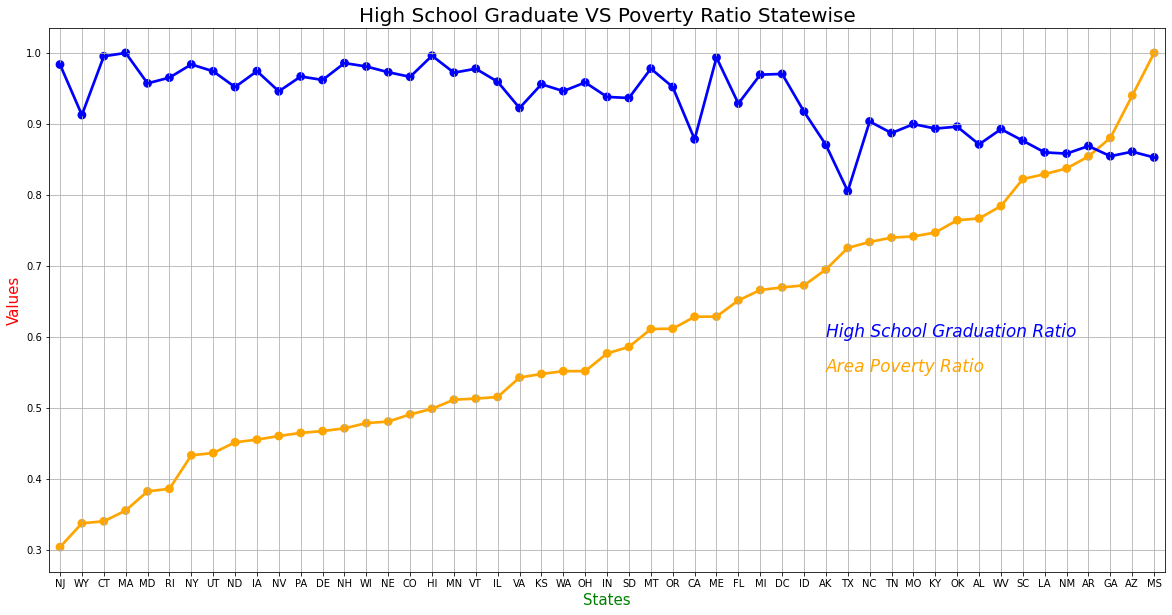

In [35]:
#let's plot point plot
f,ax1 = plt.subplots(figsize=(20,10))
sns.pointplot(x='area_list', y='area_poverty_ratio',data=data,color='orange',alpha=0.8)
sns.pointplot(x='area_list', y='area_highschool_ratio',data=data,color='blue',alpha=0.8)
plt.text(35,0.6,'High School Graduation Ratio',color='blue',fontsize=17,style='italic')
plt.text(35,0.55,'Area Poverty Ratio',color='orange',fontsize=17,style='italic')
plt.xlabel('States',fontsize = 15, color='green')
plt.ylabel('Values',fontsize = 15, color='red')
plt.title('High School Graduate VS Poverty Ratio Statewise',fontsize = 20, color='black')
plt.grid()

In [36]:
dataFM_areaList_areaPovertyratio_sorted.head()

,area_list,area_poverty_ratio
24,MS,1.000000
2,AZ,0.939884
10,GA,0.880204
3,AR,0.854151
31,NM,0.837207


In [37]:
sorted_data2.area_highschool_ratio.head()

43    0.805044
24    0.852679
10    0.854458
31    0.858124
18    0.859760
Name: area_highschool_ratio, dtype: float64

## **Joint Plot Diagram**

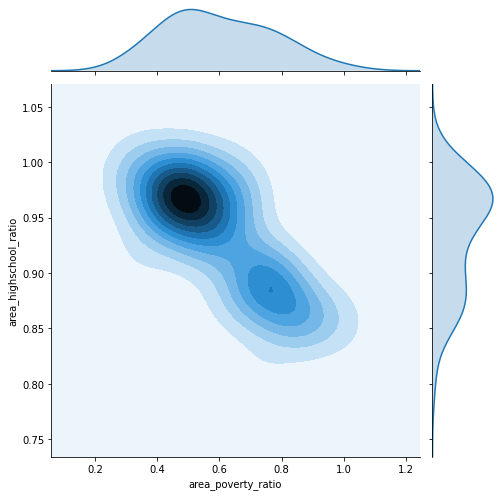

In [38]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# joint kernel density
# pearsonr= if it is 1, there is positive correlation and if it is, -1 there is negative correlation.
# If it is zero, there is no correlation between variables
# Show the joint distribution using kernel density estimation 
sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", height=7)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


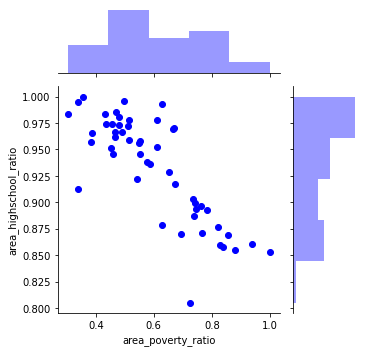

In [39]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=data,size=5, ratio=3, color="b")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


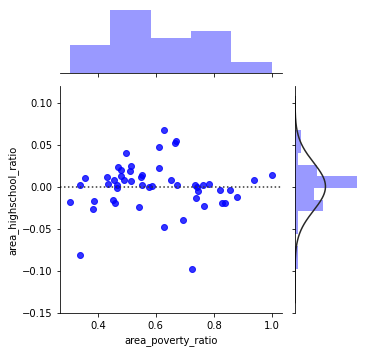

In [40]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=data, kind="resid", size=5, ratio=3, color="b")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


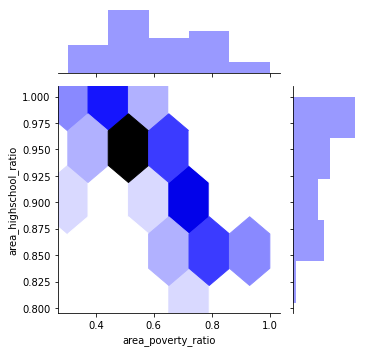

In [41]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=data, kind="hex", size=5, ratio=3, color="b")

## **Pie Chart**

In [42]:
police_killing.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [43]:
police_killing.race.head()

0    A
1    W
2    H
3    W
4    H
Name: race, dtype: object

In [44]:
police_killing.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [45]:
police_killing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

Text(0.5, 1.0, 'Killed by race distribution')

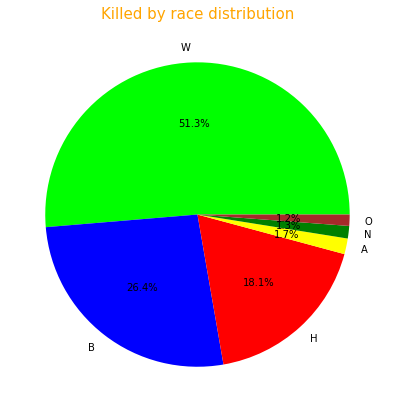

In [46]:
police_killing.race.dropna(inplace=True)
labels = police_killing.race.value_counts().index
colors = ['lime','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = police_killing.race.value_counts().values
#visualise now
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
plt.title('Killed by race distribution',color='orange',fontsize=15)

## Linear Regression Model Plot

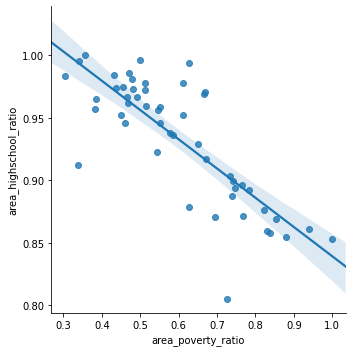

In [47]:
sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data, truncate=False, logistic=False)
plt.show()

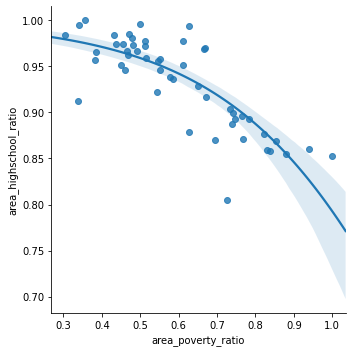

In [48]:
sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data, truncate=False, logistic=True)
plt.show()

## KDE Plot

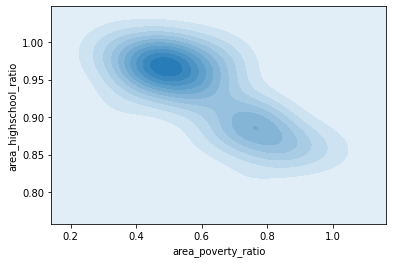

In [49]:
sns.kdeplot(data.area_poverty_ratio, data.area_highschool_ratio, shade=True, cut=2)
plt.show()

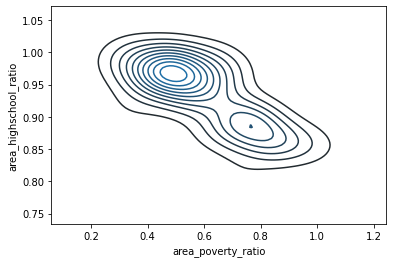

In [50]:
sns.kdeplot(data.area_poverty_ratio, data.area_highschool_ratio, shade=False)
plt.show()

## Violin Plot

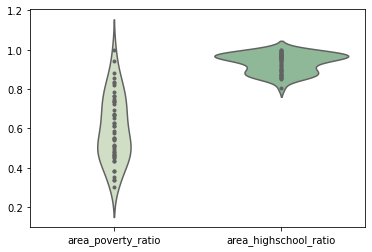

In [51]:
palette = sns.cubehelix_palette(n_colors=4, rot=-0.5, dark=0.3)
sns.violinplot(data=data, palette=palette, inner='points') 

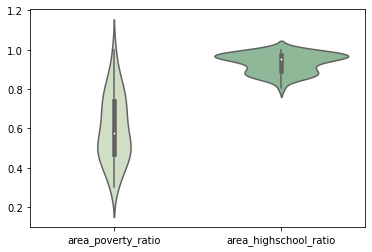

In [52]:
palette = sns.cubehelix_palette(n_colors=4, rot=-0.5, dark=0.3)
sns.violinplot(data=data, palette=palette, inner='box') 

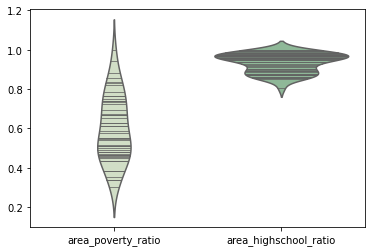

In [53]:
palette = sns.cubehelix_palette(n_colors=4, rot=-0.5, dark=0.3)
sns.violinplot(data=data, palette=palette, inner='stick') 

## HeatMap 

In [54]:
data.corrwith

<bound method DataFrame.corrwith of    area_list  area_poverty_ratio  area_highschool_ratio
30        NJ            0.303558               0.983615
50        WY            0.337139               0.912479
6         CT            0.339883               0.995254
21        MA            0.355090               1.000000
20        MD            0.382097               0.957107
39        RI            0.385707               0.965191
32        NY            0.432929               0.983804
44        UT            0.436115               0.974097
34        ND            0.451265               0.951839
15        IA            0.454971               0.974321
28        NV            0.460158               0.945857
38        PA            0.464479               0.966797
7         DE            0.467033               0.961871
29        NH            0.470900               0.985688
49        WI            0.478298               0.980827
27        NE            0.480483               0.972769
5         CO

In [55]:
data.corr

<bound method DataFrame.corr of    area_list  area_poverty_ratio  area_highschool_ratio
30        NJ            0.303558               0.983615
50        WY            0.337139               0.912479
6         CT            0.339883               0.995254
21        MA            0.355090               1.000000
20        MD            0.382097               0.957107
39        RI            0.385707               0.965191
32        NY            0.432929               0.983804
44        UT            0.436115               0.974097
34        ND            0.451265               0.951839
15        IA            0.454971               0.974321
28        NV            0.460158               0.945857
38        PA            0.464479               0.966797
7         DE            0.467033               0.961871
29        NH            0.470900               0.985688
49        WI            0.478298               0.980827
27        NE            0.480483               0.972769
5         CO    

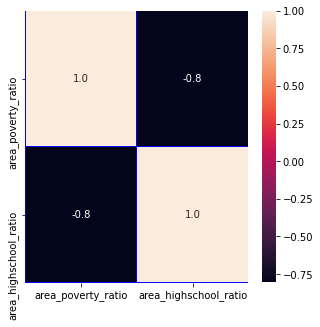

In [56]:
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, linecolor="Blue", fmt='.1f', ax=ax)
plt.show()

### Box Plot

In [60]:
police_killing.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [58]:
police_killing.manner_of_death.head()

0                shot
1                shot
2    shot and Tasered
3                shot
4                shot
Name: manner_of_death, dtype: object

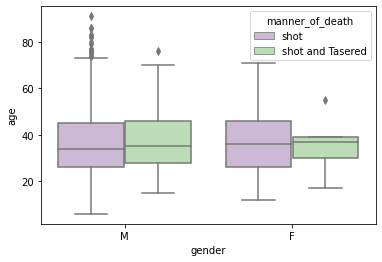

In [61]:
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=police_killing, palette="PRGn")
plt.show()

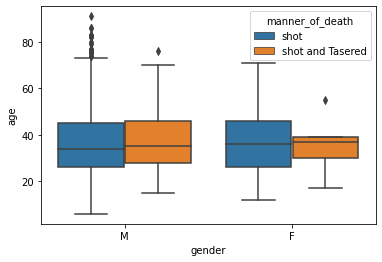

In [62]:
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=police_killing)
plt.show()

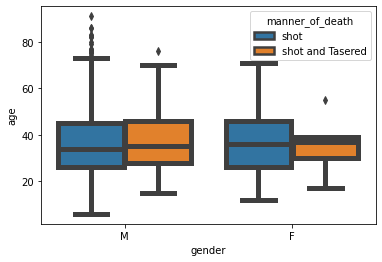

In [70]:
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=police_killing, linewidth= 5)
plt.show()

## Swarm Plot

In [71]:
police_killing.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


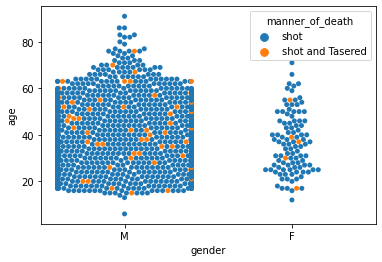

In [76]:
sns.swarmplot( x="gender", y="age", hue= "manner_of_death", data= police_killing)
plt.show()

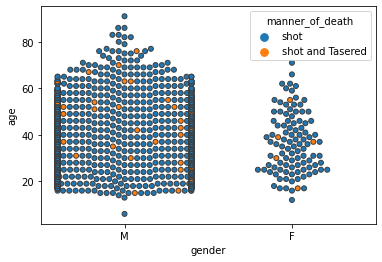

In [83]:
sns.swarmplot( x="gender", y="age", hue= "manner_of_death", data= police_killing, linewidth=1)
plt.show()

## Pair Plot

In [88]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


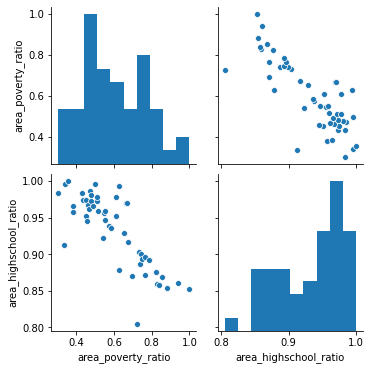

In [87]:
sns.pairplot(data = data )
plt.show()

## Count Plot

Text(0.5, 1.0, 'gender')

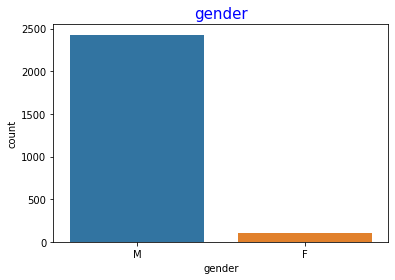

In [89]:
sns.countplot(police_killing.gender)
#sns.countplot(kill.manner_of_death)
plt.title("gender",color = 'blue',fontsize=15)

Text(0.5, 1.0, 'gender')

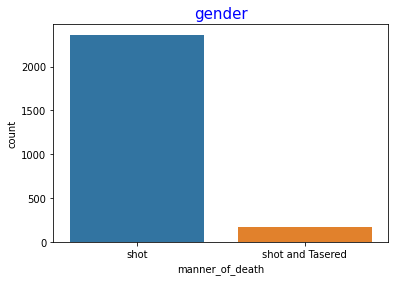

In [90]:
#sns.countplot(police_killing.gender)
sns.countplot(police_killing.manner_of_death)
plt.title("gender",color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Kill weapon')

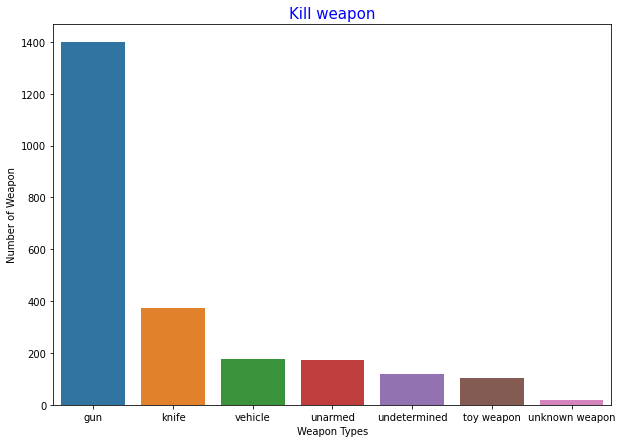

In [91]:
# kill weapon
armed = police_killing.armed.value_counts()
#print(armed)
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Age of killed people')

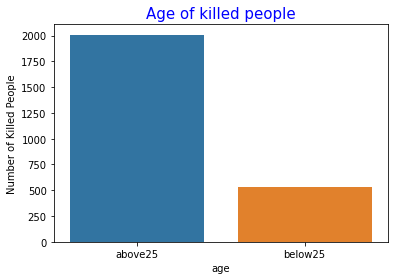

In [92]:
# age of killed people
above25 =['above25' if i >= 25 else 'below25' for i in police_killing.age]
df = pd.DataFrame({'age':above25})
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Race of killed people')

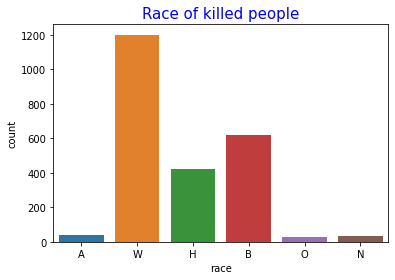

In [93]:
# Race of killed people
sns.countplot(data=police_killing, x='race')
plt.title('Race of killed people',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Most dangerous cities')

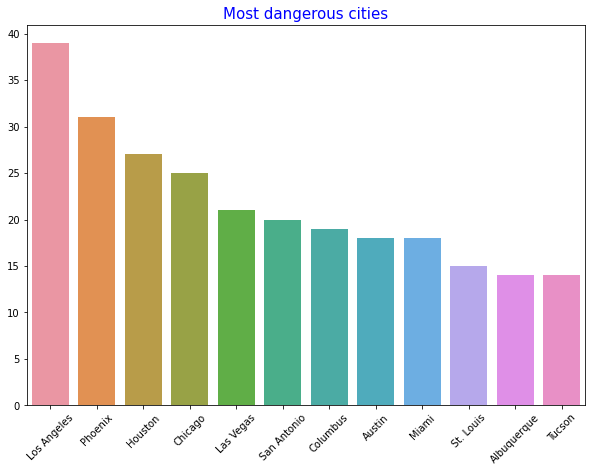

In [94]:
# Most dangerous cities
city = police_killing.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Most dangerous state')

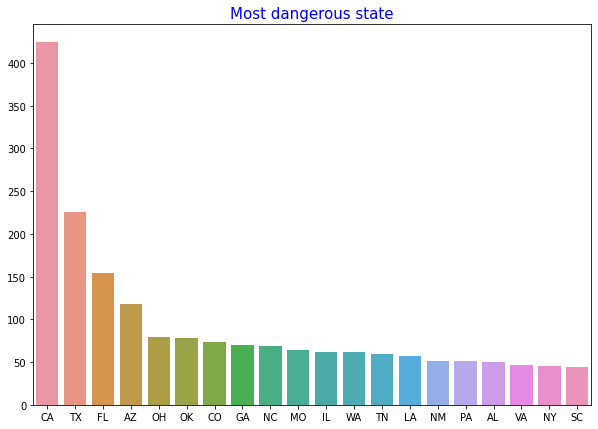

In [95]:
# most dangerous states
state = police_killing.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.title('Most dangerous state',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Having mental illness or not')

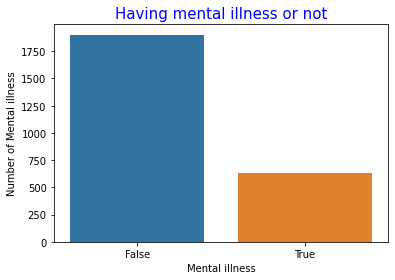

In [96]:
# Having mental ilness or not for killed people
sns.countplot(police_killing.signs_of_mental_illness)
plt.xlabel('Mental illness')
plt.ylabel('Number of Mental illness')
plt.title('Having mental illness or not',color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Threat types')

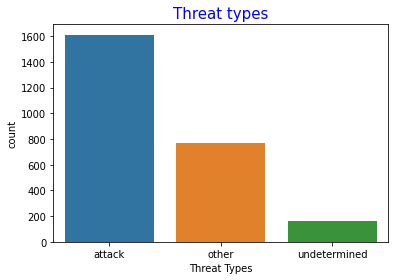

In [97]:
# Threat types
sns.countplot(police_killing.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat types',color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Flee types')

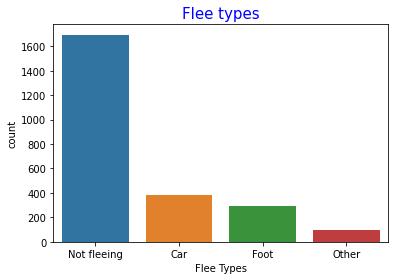

In [98]:
# Flee types
sns.countplot(police_killing.flee)
plt.xlabel('Flee Types')
plt.title('Flee types',color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Having body cameras or not on Police')

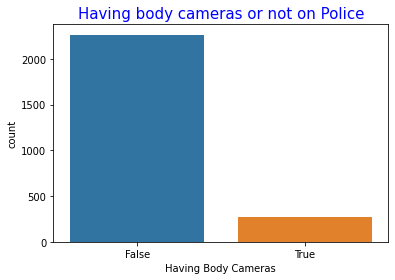

In [99]:
# Having body cameras or not for police
sns.countplot(police_killing.body_camera)
plt.xlabel('Having Body Cameras')
plt.title('Having body cameras or not on Police',color = 'blue',fontsize = 15)

Text(0.5, 1.0, 'Kill Numbers from States')

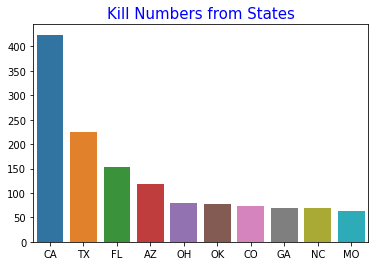

In [101]:
# Kill numbers from states in kill data
sta = police_killing.state.value_counts().index[:10]
sns.barplot(x=sta,y = police_killing.state.value_counts().values[:10])
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)